In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import math as mt
from sympy import symbols, Derivative
import statistics as st
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split


In [119]:
data1 = pd.read_excel("ex2data1-logistic.xls")
data2 = pd.read_excel("ex2data2-logistic.xls")

In [120]:
def plotData(data):
    x = np.atleast_2d(pd.DataFrame(data, columns = ['x1', 'x2']))
    x[:,0] = (x[:,0] - st.mean(x[:,0]))/st.stdev(x[:,0]);
    x[:,1] = (x[:,1] - st.mean(x[:,1]))/st.stdev(x[:,1]);
    x1 = x[:,0]
    x2 = x[:,1]
    
    y = np.array(data['y'])
    cdict = {0: 'red', 1: 'blue'}
    
    plt.figure()
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(x1[ix], x2[ix], c = cdict[g], label = g)
       
    plt.legend() 

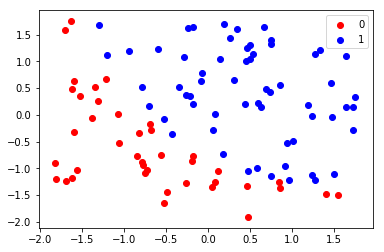

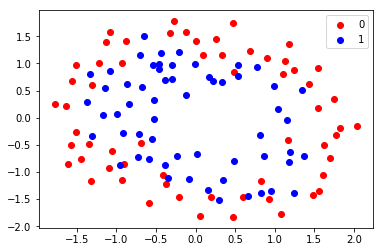

In [121]:
plotData(data1)
plotData(data2)

In [154]:
def spliteData1(data):

    x = np.atleast_2d(pd.DataFrame(data, columns = ['x1', 'x2']))
    
    x[:,0] = (x[:,0] - st.mean(x[:,0]))/st.stdev(x[:,0])
    x[:,1] = (x[:,1] - st.mean(x[:,1]))/st.stdev(x[:,1])
    y = np.array(data['y'])
#     x = x**2

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

    o =  np.ones((x_train.shape[0],1))
    x_train = np.hstack((o,x_train))

    o =  np.ones((x_test.shape[0],1))
    x_test = np.hstack((o,x_test))
    
    return x_train, x_test, y_train, y_test 

def spliteData2(data):

    x = np.atleast_2d(pd.DataFrame(data, columns = ['x1', 'x2']))
    
    x[:,0] = (x[:,0] - st.mean(x[:,0]))/st.stdev(x[:,0])
    x[:,1] = (x[:,1] - st.mean(x[:,1]))/st.stdev(x[:,1])
    y = np.array(data['y'])
    x1 = x **2
    x = np.hstack([x,x1])
    print(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

    o =  np.ones((x_train.shape[0],1))
    x_train = np.hstack((o,x_train))

    o =  np.ones((x_test.shape[0],1))
    x_test = np.hstack((o,x_test))
    
    return x_train, x_test, y_train, y_test 

In [155]:
data = data1
x_train, x_test, y_train, y_test = spliteData1(data)

In [156]:
def segmoid(theta, x):
    p = np.dot(x, theta) * -1
#     print(p)
    e =  mt.exp(p)
    h = 1/(1+e)
    return h

In [157]:
def GD1(x_train,y_train):
    
    m = y_train.shape[0]
    error = 25
    minError = 0.01
    theta_k = [1, 1, 1]
    theta_k1 = [1, 1, 1]
    alpha = 0.01
    while error > minError:
        l = [0.0, 0.0, 0.0]
        for i in range(m):
            s = y_train[i] - segmoid(theta_k, x_train[i])
            l[0] = l[0] + s 
            l[1] = l[1] + s*x_train[i][1]
            l[2] = l[2] + s*x_train[i][2]
        
        theta_k1[0] = theta_k[0] + alpha * l[0]
        theta_k1[1] = theta_k[1] + alpha * l[1]
        theta_k1[2] = theta_k[2] + alpha * l[2]
        
        error = abs(theta_k1[0] - theta_k[0])
        error = max(error, abs(theta_k1[1] - theta_k[1]))
        error = max(error, abs(theta_k1[2] - theta_k[2]))
        theta_k = theta_k1
#         print(abs(error))
        
    return theta_k

def GD2(x_train,y_train):
    
    m = y_train.shape[0]
    error = 25
    minError = 0.01
    theta_k = [1, 1, 1, 1, 1]
    theta_k1 = [1, 1, 1, 1, 1]
    alpha = 0.01
    while error > minError:
        l = [0.0, 0.0, 0.0, 0.0, 0.0]
        for i in range(m):
            s = y_train[i] - segmoid(theta_k, x_train[i])
            l[0] = l[0] + s 
            l[1] = l[1] + s*x_train[i][1]
            l[2] = l[2] + s*x_train[i][2]
            l[3] = l[3] + s*x_train[i][3]
            l[4] = l[4] + s*x_train[i][4]
        
        theta_k1[0] = theta_k[0] + alpha * l[0]
        theta_k1[1] = theta_k[1] + alpha * l[1]
        theta_k1[2] = theta_k[2] + alpha * l[2]
        theta_k1[3] = theta_k[3] + alpha * l[3]
        theta_k1[4] = theta_k[4] + alpha * l[4]
        
        error = abs(theta_k1[0] - theta_k[0])
        error = max(error, abs(theta_k1[1] - theta_k[1]))
        error = max(error, abs(theta_k1[2] - theta_k[2]))
        error = max(error, abs(theta_k1[3] - theta_k[3]))
        error = max(error, abs(theta_k1[4] - theta_k[4]))
        theta_k = theta_k1
        
    return theta_k

In [158]:
def plotDB1(data, theta):
    
    x = np.atleast_2d(pd.DataFrame(data, columns = ['x1', 'x2']))
    x1 = (x[:,0] - st.mean(x[:,0]))/st.stdev(x[:,0])
    x2 = (x[:,1] - st.mean(x[:,1]))/st.stdev(x[:,1])

    y = data['y']
    cdict = {0: 'red', 1: 'blue'}

    plt.figure()
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(x1[ix], x2[ix], c = cdict[g], label = g)       
    
    plt.legend() 
    x = np.arange(-2,2, 0.1) ;
    print(theta)
    
#     xdd = []
#     ydd = []
#     yd = (-theta[0] - theta[1]* x ** 2)/theta[2];
#     for i in range(x.shape[0]):
#         if yd[i] >= 0:
#             xdd = np.append(xdd, x[i])
#             ydd = np.append(ydd, yd[i])
        
    
#     y = np.sqrt(ydd)
#     plt.plot(xdd, y)
#     plt.plot(xdd, -y)
    
    plt.plot(x, -1*(theta[0] + theta[1]*x)/theta[2])
    
    plt.show()

def plotDB2(data, theta):
    
    x = np.atleast_2d(pd.DataFrame(data, columns = ['x1', 'x2']))
    x[:,0] = (x[:,0] - st.mean(x[:,0]))/st.stdev(x[:,0])
    x[:,1] = (x[:,1] - st.mean(x[:,1]))/st.stdev(x[:,1])
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x **2
    x = np.hstack([x,x3])
    
    y = data['y']
    cdict = {0: 'red', 1: 'blue'}

    plt.figure()
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(x1[ix], x2[ix], c = cdict[g], label = g)       
    plt.legend() 
    print(theta)
 
    plt.show()

[0.8769956434056839, 1.2029911681399894, 1.146843077484327]


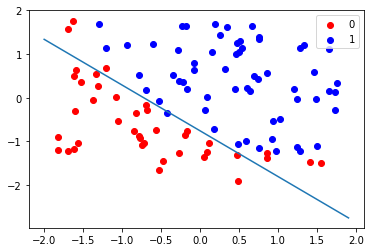

In [159]:
theta = GD1(x_train, y_train)
plotDB1(data, theta)


In [160]:
def accuracy(x_test, y_test, theta):
    
    m = y_test.shape[0]
    error = 0
    y = 2
    for i in range(m):
        ht = segmoid(theta, x_test[i])
        if ht > 1-ht:
            y = 1
        else:
            y = 0
            
        if y != y_test[i]:
            error = error + 1
        
    return 100*(m-error+0.0)/m

In [161]:
accuracy(x_test,y_test,theta)

90.0

In [162]:
a = np.array([1,2, 3])
b = np.array([11,12, 13])
np.matmul(b,a)
# np.multiply(a,b)
# c = a[0]
# print(type(c), a.shape, b.shape)
# np.matmul(a,b)
# b*a

74